In [43]:
import numpy as np
from scipy import interpolate
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import seaborn as sns

plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.rc('mathtext', fontset='stix')
plt.rc('font', family='STIXGeneral')
plt.rc('font', size=15)
plt.rc('figure', autolayout=True)
plt.rc('axes', titlesize=16, labelsize=17)
plt.rc('lines', linewidth=2, markersize=6)
plt.rc('legend', fontsize=15)
plt.rc('figure')

#%matplotlib notebook
%matplotlib inline

In [2]:
### --- Here we read in the files

m_lst = []

for indx in range(6):
    file_name = 'Files/with_matter_m_' + str(indx + 1) + '.npz'
    print(file_name)
    
    m_tmp = np.load(file_name, allow_pickle = True)
    m_lst.append(m_tmp['arr_0'])

### --- m_lst is the big array of all results
m_lst = np.array(m_lst)

#out = [r, r_prime, theta, theta_prime, Hubble_sqr_plt, scalar_pressure, scalar_energy, \
#alpha, m, vev, V0, turning_term, sol_eps, epsilon_potential]


N_lst = np.linspace(-15., 2., 1e5)
h = N_lst[1] - N_lst[0]

Files/with_matter_m_1.npz
Files/with_matter_m_2.npz
Files/with_matter_m_3.npz
Files/with_matter_m_4.npz
Files/with_matter_m_5.npz
Files/with_matter_m_6.npz


In [5]:
### --- Choose the current run
tmp_run = m_lst[0]

### --- Omega^2/9H^2
turning_term = tmp_run[11]
turning_term_IF = interpolate.interp1d(N_lst, turning_term)
### --- H^2
Hubble_sqr = tmp_run[4]
Hubble_sqr_IF = interpolate.interp1d(N_lst, Hubble_sqr)

Omega_sqr_over_H0_sqr_today = turning_term_IF(0.)*9.

print("Omega^2/H^2 today = ", Omega_sqr_over_H0_sqr_today)
print("H_0^2 = ", Hubble_sqr_IF(0.))

### --- M_eff^2 = m^2 - \Omega^2
Meff_sqr_over_H0_sqr = tmp_run[8]**2 - Omega_sqr_over_H0_sqr_today

print("M_eff^2/H_0^2 = ", Meff_sqr_over_H0_sqr)

print("c_s^2 = ", 1./(1. + 4.*Omega_sqr_over_H0_sqr_today/Meff_sqr_over_H0_sqr))
print(1./(1. + 4.*750/150))

Omega^2/H^2 today =  753.4374300473294
H_0^2 =  1.0000002835237392
M_eff^2/H_0^2 =  146.56256995267063
c_s^2 =  0.046375976959569964
0.047619047619047616


(-15.0, 2.0)

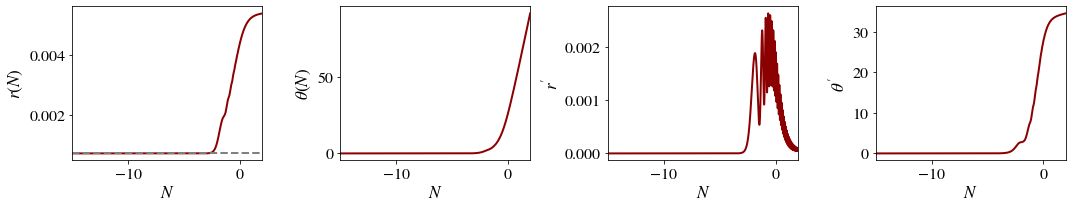

In [26]:
#### --- First we plot the solutions for one of the alpha-values --- ###

tmp = 0
r = m_lst[tmp][0]
r_prime = m_lst[tmp][1]
theta = m_lst[tmp][2]
theta_prime = m_lst[tmp][3]
vev = m_lst[tmp][9]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,3))

########### --------------------------- ###########
ax1.plot(N_lst, r, color = "darkred")
ax1.set_xlabel(r"$N$")
ax1.set_ylabel(r"$r(N)$")

ax1.axhline(vev, c = "gray", ls = "--")
ax1.set_xlim([min(N_lst), max(N_lst)])
########### --------------------------- ###########

########### --------------------------- ###########
ax2.plot(N_lst, theta, color = "darkred")
ax2.set_xlabel(r"$N$")
ax2.set_ylabel(r"$\theta(N)$")
ax2.set_xlim([min(N_lst), max(N_lst)])
########### --------------------------- ###########

########### --------------------------- ###########
ax3.plot(N_lst, r_prime, color = "darkred")
ax3.set_xlabel(r"$N$")
ax3.set_ylabel(r"$r^\prime$")
ax3.set_xlim([min(N_lst), max(N_lst)])
########### --------------------------- ###########

########### --------------------------- ###########
ax4.plot(N_lst, theta_prime, color = "darkred")
ax4.set_xlabel(r"$N$")
ax4.set_ylabel(r"$\theta^\prime$")
ax4.set_xlim([min(N_lst), max(N_lst)])
########### --------------------------- ###########

[30.0 40.0 50.0 60.0 70.0 80.0]


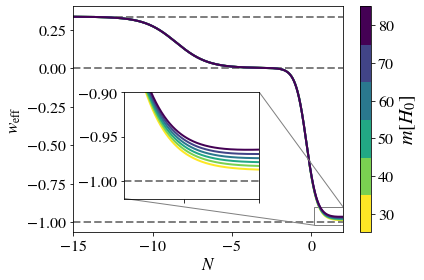

In [38]:
#### --- Here we plot the w_eff as a function of N and for different values of m --- ###

fig, ax = plt.subplots()

#########---------#########
axins = ax.inset_axes([0.19, 0.15, 0.5, 0.47])
x1, x2, y1, y2 = 0.2, 2., -1.02, -0.9
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

axins.set_xticklabels('')
#axins.set_yticklabels('')
#########---------#########

ax.axhline(1./3., c = "gray", ls = "--")
ax.axhline(0., c = "gray", ls = "--")
ax.axhline(-1., c = "gray", ls = "--")

axins.axhline(-1., c = "gray", ls = "--")


colorparams = m_lst[:, 8]
normalize = mcolors.Normalize(vmin=np.min(colorparams), vmax=np.max(colorparams))
colormap = cm.viridis_r#ListedColormap(sns.cubehelix_palette(len(colorparams), reverse = False).as_hex())



for indx_m, m_tmp in enumerate(m_lst): 
    color = colormap(normalize(m_tmp[8]))
    
    sol_eps = m_tmp[12]
    
    ax.plot(N_lst, -1. + 2./3.*sol_eps, color = color)
    axins.plot(N_lst, -1. + 2./3.*sol_eps, color = color)
    
ax.set_xlabel(r"$N$")
ax.set_ylabel(r"$w_\mathrm{eff}$")



s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
s_map.set_array(colorparams)

halfdist = (colorparams[1] - colorparams[0])/2.0
boundaries = np.linspace(colorparams[0] - halfdist, colorparams[-1] + halfdist, len(colorparams) + 1)

cbar = fig.colorbar(s_map, ticks = np.linspace(30., 80., 6), spacing='proportional', boundaries = boundaries)
cbarlabel = r'$m [H_0]$'
cbar.set_label(cbarlabel, fontsize=20)

ax.set_xlim([min(N_lst), max(N_lst)])

mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")

plt.savefig("Figs/w_with_matter.pdf")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


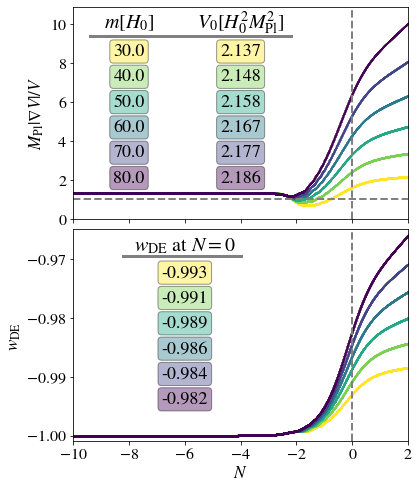

In [41]:
#plt.style.use('fast')
#plt.rc('font', size=24)

#ax = plt.gca()
fig = plt.figure(figsize = (6., 8.))
axes = fig.subplots(2, 1, sharex='col', gridspec_kw={'hspace': 0.05, 'wspace': 0})

for indx_m, m_tmp in enumerate(m_lst):        
    color = colormap(normalize(m_tmp[8]))
    
    eps_potential = m_tmp[13]
    
    axes[0].plot(N_lst, np.sqrt(2.*eps_potential), 'o', color = color, ms = 0.5, markevery = 15, rasterized=True)

    
    axes[0].text(-8., 9. - indx_m*1.3, str(np.round(m_tmp[8], 3)),
         rotation = 0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
         color = "k",
         bbox=dict(facecolor=color, alpha = .4, boxstyle='round,pad=0.2'), zorder = 2, size=18)
    
    axes[0].text(-4., 9. - indx_m*1.3, str(np.round(m_tmp[10], 3)),
         rotation = 0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
         color = "k",
         bbox=dict(facecolor=color, alpha = .4, boxstyle='round,pad=0.2'), zorder = 2, size=18)

for indx_m, m_tmp in enumerate(m_lst):        
    color = colormap(normalize(m_tmp[8]))
    
    scalar_pressure = m_tmp[5]
    scalar_energy = m_tmp[6]
    
    w_phi_interp = interpolate.interp1d(N_lst, scalar_pressure/scalar_energy)
    
    CPL_phi_w0 = w_phi_interp(0.)
    CPL_phi_wa = (w_phi_interp(h) - w_phi_interp(-h))/2./h
    
    axes[1].plot(N_lst, scalar_pressure/scalar_energy, 'o', color = color, ms = 0.5, markevery = 10, rasterized = True)
    
    axes[1].text(-6., -0.971 - indx_m*0.0043, str(np.round(CPL_phi_w0, 3)),
         rotation = 0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
         color = "k",
         bbox=dict(facecolor=color, alpha = .4, boxstyle='round,pad=0.2'), zorder = 2, size=18)


    

############ ----------------- ############ ----------------- ############
axes[0].text(-8., 10.6, r"$m[H_0]$",
         rotation = 0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
         color = 'k',
         bbox=dict(facecolor='white', alpha = 1., edgecolor = "white", boxstyle='round,pad=0.2'), size=20, zorder = 1)

axes[0].text(-4., 10.8, r"$V_0[H_0^2M_\mathrm{Pl}^2]$",
         rotation = 0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
         color = 'k',
         bbox=dict(facecolor='white', alpha = 1., edgecolor = "white", boxstyle='round,pad=0.2'), size=20, zorder = 1)

axes[0].plot(np.linspace(-9.4, -2.2, 1000), 9.4*np.ones(1000), lw = 3., c = "gray")

axes[1].text(-6., -.966, r"$w_\mathrm{DE}$" + " at " + r"$N = 0$",
         rotation = 0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
         color = 'k',
         bbox=dict(facecolor='white', alpha = 1., edgecolor = "white", boxstyle='round,pad=0.2'), size=20, zorder = 1)
axes[1].plot(np.linspace(-8.2, -4., 1000), -0.9695*np.ones(1000), lw = 3., c = "gray")
############ ----------------- ############ ----------------- ############

####### -------- ####### -------- #######
axes[0].axvline(0., c = "gray", ls = "--")
axes[0].axhline(1., c = "gray", ls = "--")
axes[1].axvline(0., c = "gray", ls = "--")
####### -------- ####### -------- #######

####### -------- ####### -------- #######
axes[0].set_ylabel(r"$M_\mathrm{Pl}\vert\nabla V\vert/V$")
axes[1].set_xlabel(r"$N$")
axes[1].set_ylabel(r"$w_\mathrm{DE}$")
####### -------- ####### -------- #######

####### -------- ####### -------- #######
axes[0].set_xlim([-10, max(N_lst)])
axes[0].set_ylim([0., 10.9])
axes[1].set_xlim([-10., max(N_lst)])
axes[1].set_ylim([-1.001, -0.965])
####### -------- ####### -------- #######


plt.savefig("Figs/combined.pdf", bbox_inches='tight', dpi = 800)

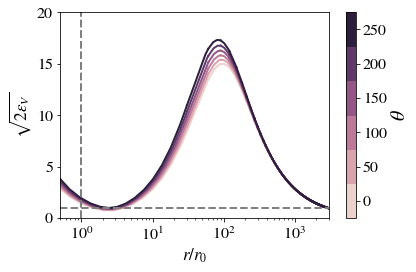

In [53]:
plt.style.use('fast')
plt.rc('font', size=14)

fig = plt.figure()
ax = plt.gca()

alpha = 2e-3 # In units of Mpl^2H_0^2
m = 30. # In units of H_0
vev = 7.*1e-4 # In units of M_pl
V0 = 2. # In units of Mpl^2H_0^2. This value will later be adjusted to have a flat universe.

r_ini = vev

theta_lst = np.array([0., 50., 100., 150., 200., 250.])
x_lst = np.linspace(vev/2., 3e3*vev, 1e6)
numer = m**4*(x_lst - vev)**2 + alpha**2/x_lst**2

colorparams = theta_lst
normalize = mcolors.Normalize(vmin=np.min(colorparams), vmax=np.max(colorparams))
colormap = ListedColormap(sns.cubehelix_palette(len(colorparams), reverse = False).as_hex())
#cm.viridis_r#


for indx_theta, theta_tmp in enumerate(theta_lst):        
    color = colormap(normalize(theta_lst[indx_theta]))
    
    denom = (V0 - alpha*theta_tmp + m**2*(x_lst - vev)**2/2.)**2
    ax.plot(x_lst/vev, np.sqrt(numer/denom), color = color)

s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
s_map.set_array(colorparams)

halfdist = (colorparams[1] - colorparams[0])/2.0
boundaries = np.linspace(colorparams[0] - halfdist, colorparams[-1] + halfdist, len(colorparams) + 1)

cbar = fig.colorbar(s_map, ticks = theta_lst, boundaries = boundaries, spacing='proportional')


cbarlabel = r'$\theta$'
cbar.set_label(cbarlabel, fontsize=20)

ax.axhline([1.], ls = "--", c = "gray")
ax.axvline([1.], ls = "--", c = "gray")
ax.axvline([r_ini/vev], ls = "--", c = "gray")

ax.set_xscale("log")
ax.set_yscale("linear")
    
ax.set_xlabel(r"$r/r_0$")
ax.set_ylabel(r"$\sqrt{2\epsilon_V}$")

ax.set_xlim([min(x_lst)/vev, max(x_lst)/vev])
ax.set_ylim([0., 20.])


plt.savefig("Figs/c.pdf")